<a href="https://colab.research.google.com/github/Viny2030/sklearn/blob/main/trees_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision tree for regression

In this notebook, we present how decision trees are working in regression
problems. We show differences with the decision trees previously presented in
a classification setting.

First, we load the penguins dataset specifically for solving a regression
problem.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

# Árbol de decisión para regresión
En este cuaderno, presentamos cómo funcionan los árboles de decisión en problemas de regresión. Mostramos las diferencias con los árboles de decisión presentados anteriormente en un entorno de clasificación.

Primero, cargamos el conjunto de datos de pingüinos específicamente para resolver un problema de regresión.

# Nota

Si desea una descripción más detallada de este conjunto de datos, puede consultar la sección Apéndice - Descripción de conjuntos de datos al final de este MOOC.

In [3]:
import pandas as pd

penguins = pd.read_csv("https://raw.githubusercontent.com/Viny2030/datasets/refs/heads/main/penguins.csv")

feature_name = "bill_length_mm"
target_name = "body_mass_g"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

To illustrate how decision trees predict in a regression setting, we create a
synthetic dataset containing some of the possible flipper length values
between the minimum and the maximum of the original data.

Para ilustrar cómo los árboles de decisión predicen en un entorno de regresión, creamos un conjunto de datos sintéticos que contiene algunos de los posibles valores de longitud del flipper entre el mínimo y el máximo de los datos originales.

In [4]:
import numpy as np

data_test = pd.DataFrame(
    np.arange(data_train[feature_name].min(), data_train[feature_name].max()),
    columns=[feature_name],
)

Using the term "test" here refers to data that was not used for training. It
should not be confused with data coming from a train-test split, as it was
generated in equally-spaced intervals for the visual evaluation of the
predictions.

Note that this is methodologically valid here because our objective is to get
some intuitive understanding on the shape of the decision function of the
learned decision trees.

However, computing an evaluation metric on such a synthetic test set would be
meaningless since the synthetic dataset does not follow the same distribution
as the real world data on which the model would be deployed.

El término "prueba" se utiliza aquí para hacer referencia a datos que no se utilizaron para el entrenamiento. No debe confundirse con los datos que provienen de una división de entrenamiento y prueba, ya que se generaron en intervalos igualmente espaciados para la evaluación visual de las predicciones.

Tenga en cuenta que esto es metodológicamente válido aquí porque nuestro objetivo es obtener una comprensión intuitiva de la forma de la función de decisión de los árboles de decisión aprendidos.

Sin embargo, calcular una métrica de evaluación en un conjunto de prueba sintético de este tipo no tendría sentido, ya que el conjunto de datos sintéticos no sigue la misma distribución que los datos del mundo real en los que se implementaría el modelo.

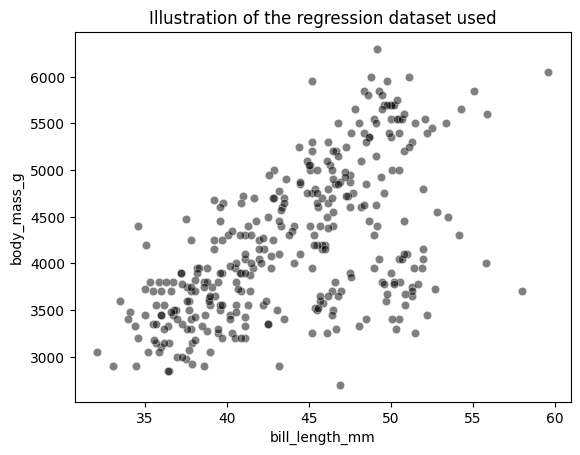

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
_ = plt.title("Illustration of the regression dataset used")

We first illustrate the difference between a linear model and a decision
tree.

Primero ilustramos la diferencia entre un modelo lineal y un árbol de decisión.

In [7]:
# Drop rows with any NaN values in either data_train or target_train
data_train = data_train.dropna()
target_train = target_train[data_train.index]  # Align target_train with the updated data_train

In [8]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)
target_predicted = linear_model.predict(data_test)

In [9]:
target_predicted

array([3168.33711505, 3255.7523921 , 3343.16766916, 3430.58294621,
       3517.99822326, 3605.41350032, 3692.82877737, 3780.24405442,
       3867.65933147, 3955.07460853, 4042.48988558, 4129.90516263,
       4217.32043969, 4304.73571674, 4392.15099379, 4479.56627084,
       4566.9815479 , 4654.39682495, 4741.812102  , 4829.22737906,
       4916.64265611, 5004.05793316, 5091.47321021, 5178.88848727,
       5266.30376432, 5353.71904137, 5441.13431843, 5528.54959548])

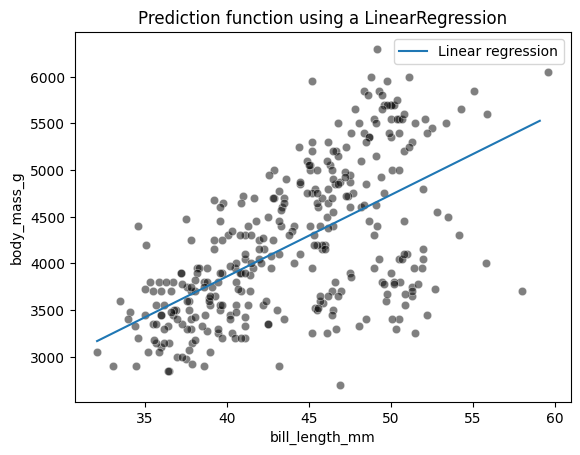

In [10]:
sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
plt.plot(data_test[feature_name], target_predicted, label="Linear regression")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

On the plot above, we see that a non-regularized `LinearRegression` is able to
fit the data. A feature of this model is that all new predictions will be on
the line.

En el gráfico anterior, vemos que una regresión lineal no regularizada puede ajustar los datos. Una característica de este modelo es que todas las predicciones nuevas estarán en la línea.

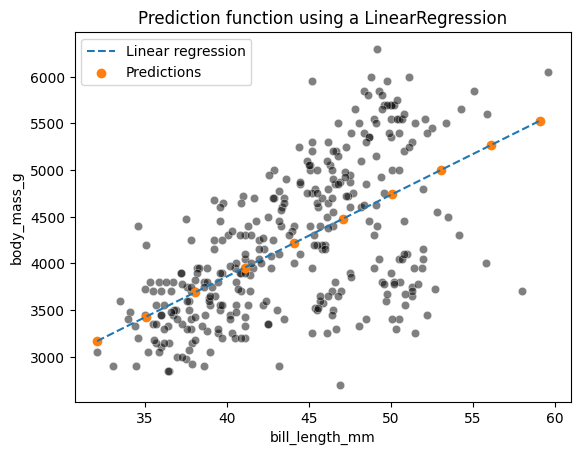

In [11]:
ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
plt.plot(
    data_test[feature_name],
    target_predicted,
    label="Linear regression",
    linestyle="--",
)
plt.scatter(
    data_test[::3],
    target_predicted[::3],
    label="Predictions",
    color="tab:orange",
)
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

Contrary to linear models, decision trees are non-parametric models: they do
not make assumptions about the way data is distributed. This affects the
prediction scheme. Repeating the above experiment highlights the differences.

A diferencia de los modelos lineales, los árboles de decisión son modelos no paramétricos: no hacen suposiciones sobre la forma en que se distribuyen los datos. Esto afecta el esquema de predicción. La repetición del experimento anterior resalta las diferencias.

In [12]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

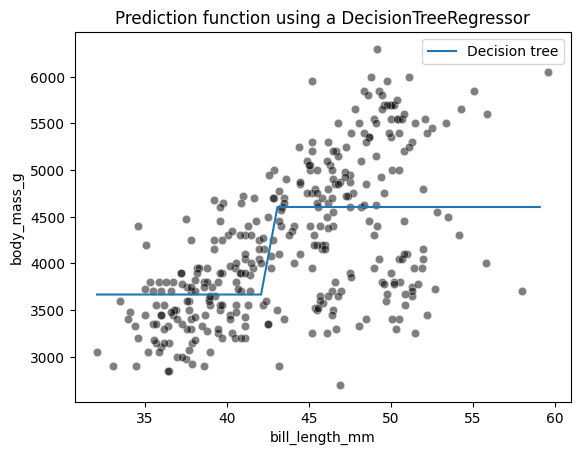

In [13]:
sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

We see that the decision tree model does not have an *a priori* distribution
for the data and we do not end-up with a straight line to regress flipper
length and body mass.

Instead, we observe that the predictions of the tree are piecewise constant.
Indeed, our feature space was split into two partitions. Let's check the tree
structure to see what was the threshold found during the training.

Vemos que el modelo de árbol de decisión no tiene una distribución a priori para los datos y no obtenemos una línea recta para la regresión de la longitud de la aleta y la masa corporal.

En cambio, observamos que las predicciones del árbol son constantes por partes. De hecho, nuestro espacio de características se dividió en dos particiones. Verifiquemos la estructura del árbol para ver cuál fue el umbral encontrado durante el entrenamiento.

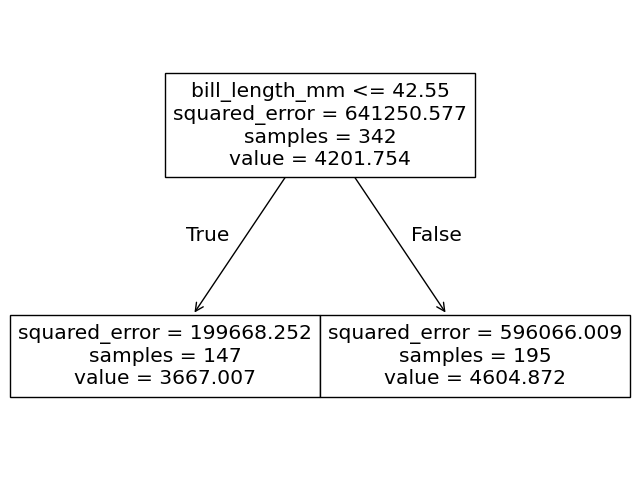

In [14]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=[feature_name], ax=ax)

The threshold for our feature (flipper length) is 206.5 mm. The predicted
values on each side of the split are two constants: 3698.71 g and 5032.36 g.
These values corresponds to the mean values of the training samples in each
partition.

In classification, we saw that increasing the depth of the tree allowed us to
get more complex decision boundaries. Let's check the effect of increasing the
depth in a regression setting:

El umbral para nuestra característica (longitud de la aleta) es de 206,5 mm. Los valores predichos en cada lado de la división son dos constantes: 3698,71 g y 5032,36 g. Estos valores corresponden a los valores medios de las muestras de entrenamiento en cada partición.

En la clasificación, vimos que aumentar la profundidad del árbol nos permitió obtener límites de decisión más complejos. Verifiquemos el efecto de aumentar la profundidad en un entorno de regresión:

In [15]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

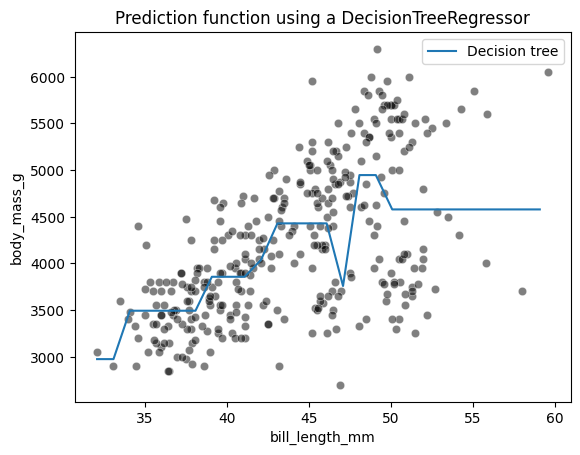

In [16]:
sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

Increasing the depth of the tree increases the number of partitions and thus
the number of constant values that the tree is capable of predicting.

In this notebook, we highlighted the differences in behavior of a decision
tree used in a classification problem in contrast to a regression problem.

Al aumentar la profundidad del árbol, aumenta la cantidad de particiones y, por lo tanto, la cantidad de valores constantes que el árbol es capaz de predecir.

En este cuaderno, destacamos las diferencias en el comportamiento de un árbol de decisión utilizado en un problema de clasificación en comparación con un problema de regresión.
